In [3]:
#importing packages
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import ttest_ind

In [4]:
#showing the first 10 rows of the train file
traindata = pd.read_csv("train.csv")
traindata.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
#showing the first 10 rows of the test file
testdata = pd.read_csv("test.csv")
testdata.head(10)
test_id = testdata["PassengerId"]

In [35]:
traindata.isnull().sum()
#isnull is a function to test which column has null values

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [36]:
testdata.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [7]:
traindata.Age = traindata.Age.fillna(traindata.Age.mean())
#For the age column I have used the mean value to fillup the null values.
#The reason for using mean is because it helps to get a central tendency of the data.
#And I think its also good because it fills up the missing value with a number that
#represents the typical value of the training dataset


In [37]:
testdata.Age = testdata.Age.fillna(testdata.Age.mean())

In [38]:
traindata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
traindata.fillna(traindata.Embarked.mode()[0],inplace=True)
testdata.fillna(testdata.Embarked.mode()[0],inplace=True)


In [40]:
traindata.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [41]:
traindata.drop_duplicates(keep='first')
traindata
#Here I have used the drop_duplicates function to drop the duplicate values in the dataset
#.Here I have used the parameter keep first as I only want to store the first occurence in this
#dataset and remove all the second occurence

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


In [42]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [43]:
traindata.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


In [44]:
def age_group(age):
    if age < 18:
        return 'Child'
    elif age>18 and age<50:
        return 'Adult'
    else:
        return 'Senior'

#Here I have  applied the age_group function to create the AgeGroup column
traindata['AgeGroup'] = traindata['Age'].apply(age_group)

In [45]:
traindata

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,S,Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,S,Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Adult


In [46]:
len(traindata['Cabin'].unique())
#we can deduce that there were 146 unique cabins

148

In [18]:
traindata.describe()
#here is some statistical description of each column

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


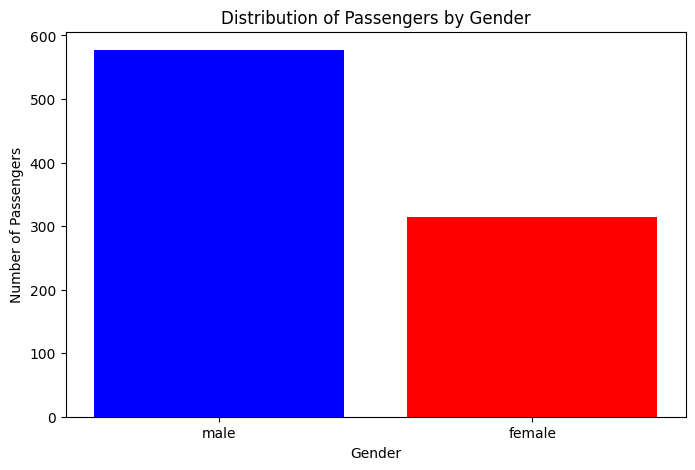

In [17]:
gender_count = traindata['Sex'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gender_count.index, gender_count.values, color=['blue', 'red'])
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Gender')
plt.show()
#Here we can see from the graph that there were more male passengers than female passengers.As the height of the male bar is more than the female one

Text(0, 0.5, 'Count')

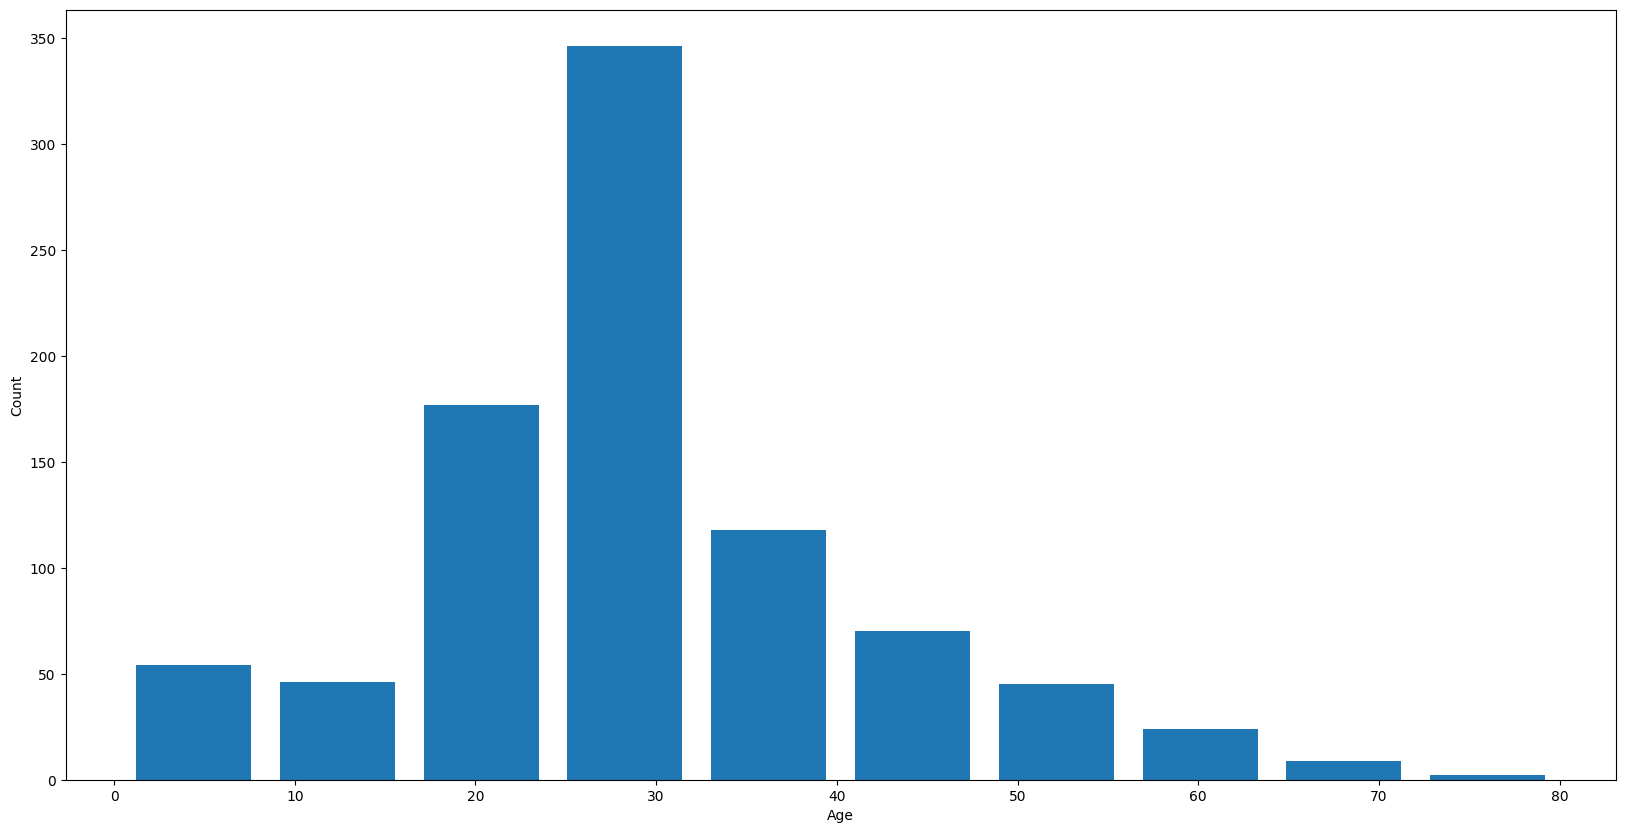

In [19]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(traindata.Age,rwidth=0.8)
plt.xlabel("Age")
plt.ylabel("Count")
#Here we can see the age distribution.As in, the count of people by age.From the graph we can say that there are 10 people in the age of 3-8

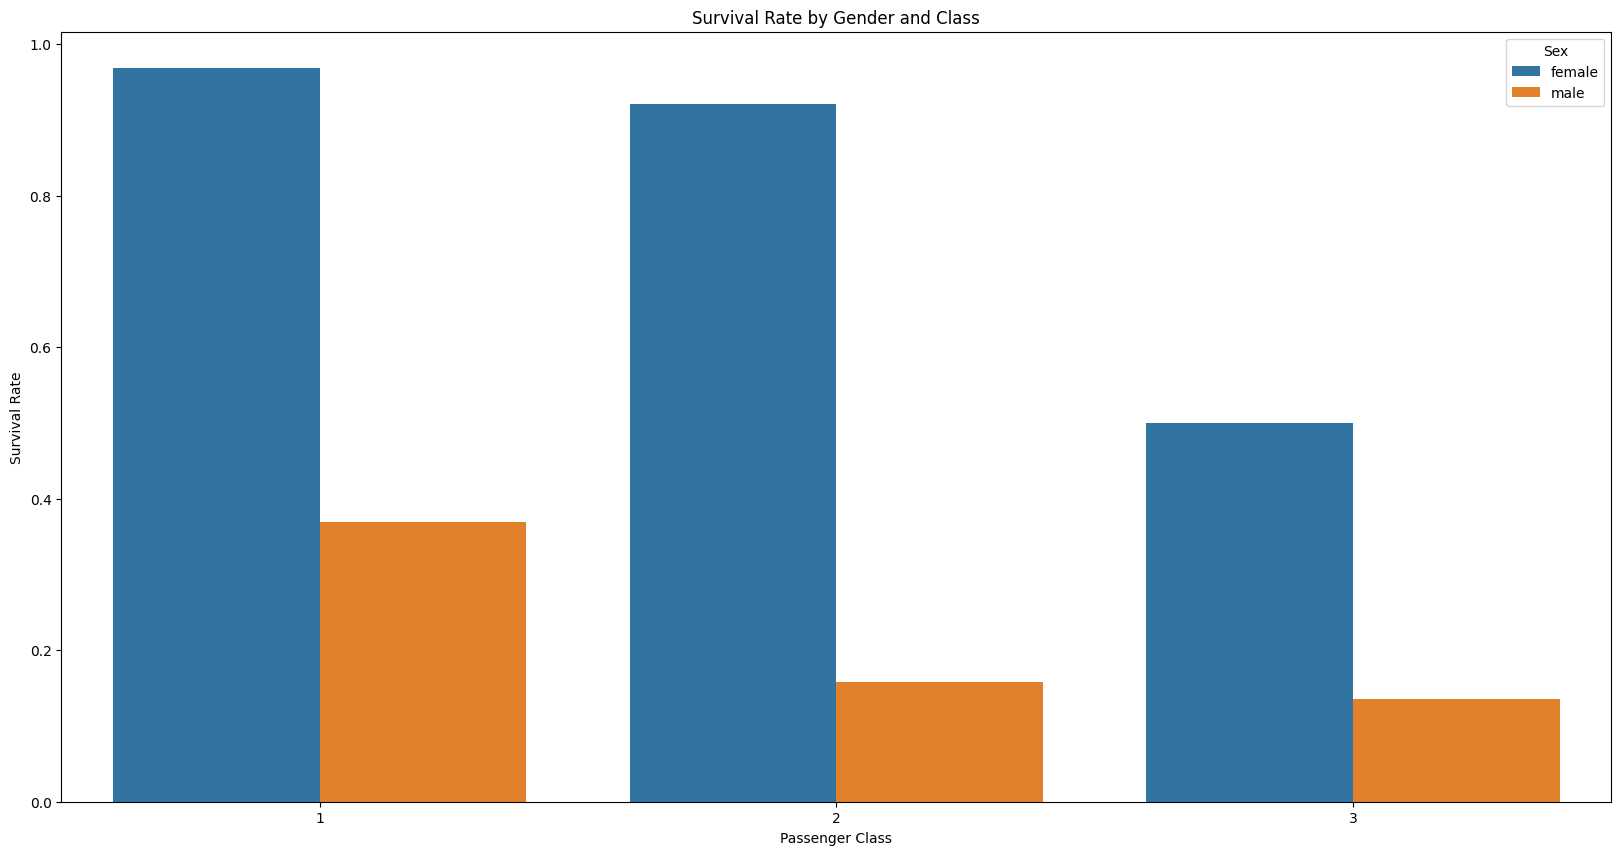

In [20]:

survival_rates = traindata.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_rates)

plt.title('Survival Rate by Gender and Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


plt.show()
#This is kind of a complex graph as it has three variables Sex,Class and survived.
#In the graph,it is shown that how is survival rate for a person by gender and his/her class.
#For example, Male in class 1 has a survival rate of 0.9 and Female in class 1 has a survival rate of 0.4

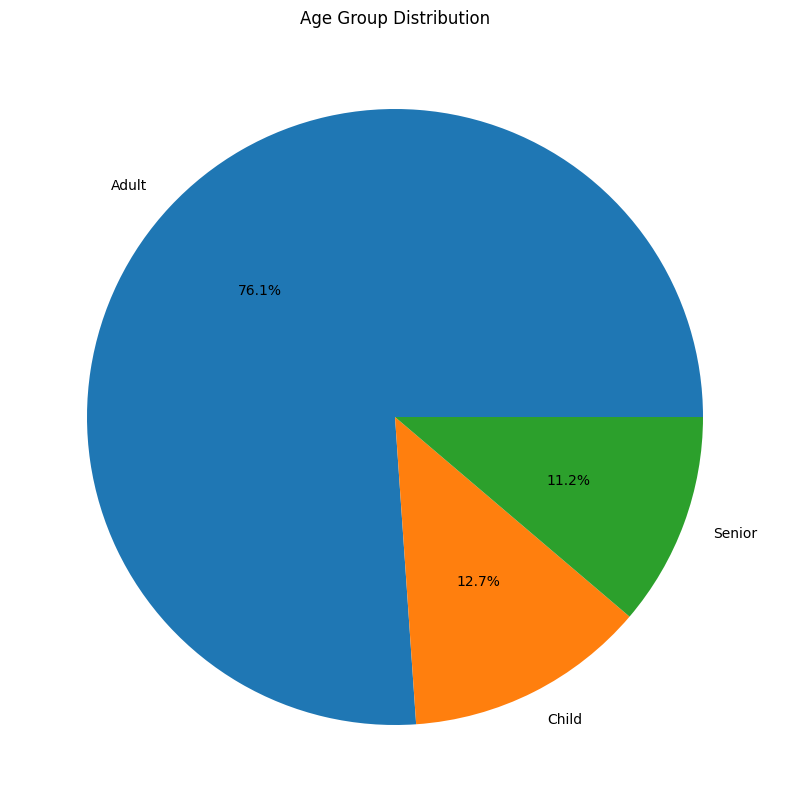

In [21]:
agegroupcount = traindata['AgeGroup'].value_counts()
plt.pie(agegroupcount.values, labels=agegroupcount.index, autopct='%1.1f%%')
plt.title("Age Group Distribution")
plt.show()
#This is a pie chart.I have used the age distribution here.As how many people are adults,child and senior.

In [22]:
def fare():
  faremean=traindata.Fare.mean()
  faremedian=traindata.Fare.median()
  faremode = traindata.Fare.mode()
  print(f"Mean of fare is {faremean},median of fare is {faremedian},mode of fare is = {faremode}")

fare()

Mean of fare is 32.204207968574636,median of fare is 14.4542,mode of fare is = 0    8.05
Name: Fare, dtype: float64


In [23]:
def Age():
  Agemean=traindata.Age.mean()
  Agemedian=traindata.Age.median()
  Agemode = traindata.Age.mode()
  print(f"Mean of Age is {Agemean},median of Age is {Agemedian},mode of Age is = {Agemode}")

Age()

Mean of Age is 29.69911764705882,median of Age is 29.69911764705882,mode of Age is = 0    29.699118
Name: Age, dtype: float64


In [24]:
male_survival = traindata[traindata['Sex'] == 'male']['Survived']
female_survival = traindata[traindata['Sex'] == 'female']['Survived']

statistic,p_value = ttest_ind(male_survival, female_survival, equal_var=False)
 #I have used equal_var=False if variances are different
print(p_value)
alpha = 0.05
if(p_value<alpha):
  print("It is true that it has significant difference in survival rates based on gender")
else:
  print("No significant difference in survival rates based on gender ")
#A t-test is performed here.It helps to find the difference if there is a statistically significant difference between the means of two variables.
#For our context,it is an independent t-test.For example,here we have used survival rate and gender.We checked whether these two are dependent or not.
#the ttest_ind() often results two variables one is a p_value another is the statistic.Thats why i have assigned statistic and p_value as the two variables for ttest_ind(male_survival, female_survival, equal_var=False)
#Here alpha is nothing but the significance level.Where if the the p_value is less than alpha.Then it was positive that it has significant differences

2.2836009226010533e-61
It is true that it has significant difference in survival rates based on gender


In [25]:
personsurvived = traindata.groupby('Sex')['Survived'].sum()
overall = traindata['Sex'].value_counts()

survived_expected = overall * (personsurvived.sum() / overall.sum()) #This gives the expected number of survivors for each gender, assuming survival is not influenced by gender.

chi2_stat, p_value = chisquare(f_obs=personsurvived, f_exp=survived_expected)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The observed survival rate differs from the hytpothetical expectation")
else:
    print("The observed survival rate does not differ from the hytpothetical expectation")
# Chi test is a statistical test used to determine if there's a significant relation between two  variables.
#Survived_expected variable represents the hypothetical expectaion.
#Like ttest chisquare also results in two values.So here also I have assigned two variables chi2_stat and p_value
#Similarly as ttest we have used a significance level of 0.05 to test whether it is positive or not

Chi-square Statistic: 1.7018635642412716
p-value: 0.1920444437893801
The observed survival rate does not differ from the hytpothetical expectation


In [26]:
newdatatrain = traindata.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
newdatatrain.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,Adult
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Adult
3,1,1,female,35.0,1,0,53.1000,S,Adult


In [47]:
newdatatest = testdata.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
newdatatest.head(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2


In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col = ['Sex','Embarked']
for j in col:
  newdatatrain[j] = le.fit_transform(newdatatrain[j])
  testdata[j] = le.fit_transform(testdata[j])
  print(le.classes_)
newdatatrain.head(6)

[0 1]
[0 1 2]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,1,22.000000,1,0,7.2500,2,Adult
1,1,1,0,38.000000,1,0,71.2833,0,Adult
2,1,3,0,26.000000,0,0,7.9250,2,Adult
3,1,1,0,35.000000,1,0,53.1000,2,Adult
4,0,3,1,35.000000,0,0,8.0500,2,Adult
5,0,3,1,29.699118,0,0,8.4583,1,Adult


()

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [65]:
y = newdatatrain["Survived"]
x = newdatatrain.drop(["Survived","AgeGroup"],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20]
        }
    },

    'svm':{
    'model':svm.SVC(gamma='auto'),
    'param': {
        'C':[1,5,10,20],
        'kernel' :['rbf','linear']
    }},
    'random_forest':{
    'model' : RandomForestClassifier(),
    'param' : {'n_estimators':[1,5,10,20]}
},
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'random_state':[1,0,2],
            'max_iter': [1000,500,100],
            'C': [1,5,10]
        }},
    'Decision Tree':{
        'model': DecisionTreeClassifier(),
        'param':{'criterion': ['gini','entropy'],
    }},
    'Multinominal':{
        'model': MultinomialNB(),
        'param':{}},
    'GaussianNB':{
        'model': GaussianNB(),
        'param':{}
        },

}

In [68]:
scores=[]
for model_name,mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['param'],cv=5,return_train_score=False)
  clf.fit(x_train,y_train)
  scores.append({
      'model':model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_
  })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

,model,best_score,best_params
0,svm,0.784968,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.793006,{'n_estimators': 10}
2,logistic_regression,0.800916,"{'C': 10, 'max_iter': 1000, 'random_state': 1}"
3,Decision Tree,0.767316,{'criterion': 'gini'}
4,Multinominal,0.682206,{}
5,GaussianNB,0.788052,{}


In [69]:
lr = LogisticRegression(C=10,random_state=1,max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=1)

In [70]:
pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8134328358208955

In [71]:
submit_pred = lr.predict(newdatatest)

In [72]:
df = pd.DataFrame({'PassengerId': test_id.values,
                   'Survived': submit_pred})

In [73]:
df.to_csv('submission.csv', index=False)